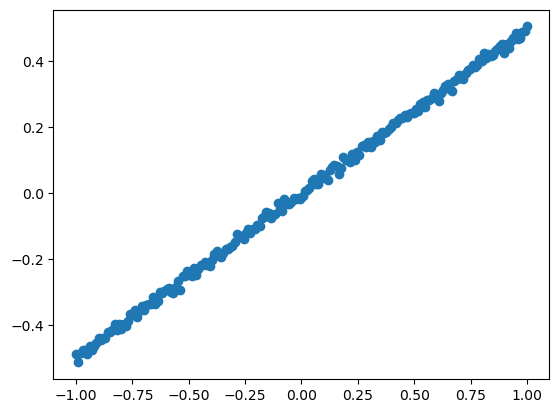

In [5]:
# 线性回归  y = wx +b 
import torch 
from torch.autograd import Variable
import numpy as np
from numpy import random 
import matplotlib.pyplot as plt
# 如果不添加这个，会导致死机，重启，且无法绘制
import os
os.environ["KMP_DUPLICATE_LIB_OK"]  =  "TRUE"

X = np.linspace(-1,1,200)
Y= 0.5 * X + 0.2 * np.random.normal(0,0.05,(200,))

plt.scatter(X,Y)

plt.show()

# 将X，Y 转成 200 batch大小，一维数据

X = Variable(torch.Tensor(X.reshape(200,1)))
Y= Variable(torch.Tensor(Y.reshape(200,1)))


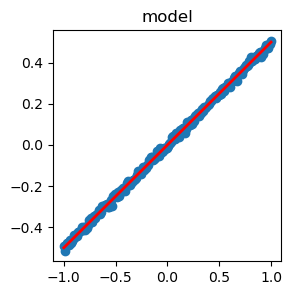

In [11]:
# 神经网络结构
model = torch.nn.Sequential(torch.nn.Linear(1,1),)

optimizer = torch.optim.SGD(model.parameters(),lr=0.5)

loss_function = torch.nn.MSELoss()

# 训练代码
for i in range(300):
    prediction = model(X)
    loss = loss_function(prediction,Y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 图形绘制
plt.figure(1,figsize=(10,3))
plt.subplot(131)
plt.title('model')
plt.scatter(X.data.numpy(),Y.data.numpy())
plt.plot(X.data.numpy(),prediction.data.numpy(),'r-',lw=2)
plt.show()

# numpy 矩阵数据保存
np.save('pred.npy',prediction.data.numpy())
pred = np.load("pred.npy")


# 模型的保存和导入
# 保存整个神经网络结构和模型参数
torch.save(model,'mymodel.pkl')

# 只保存神经网络的模型参数
torch.save(model.state_dict(),'mymodel_params.pkl')


# 导入模型
my_model = torch.load('mymodel.pkl')
